In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os
path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1,'glioma_tumor':2,'meningioma_tumor':3}

In [3]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1, 2, 3])

In [6]:
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

In [7]:
X.shape, X_updated.shape

((2870, 200, 200), (2870, 40000))

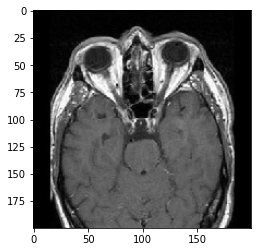

In [8]:
plt.imshow(X[0], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [14]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [15]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [18]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.759581881533101


In [19]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9390243902439024
Testing Score: 0.8170731707317073


In [16]:
pred = sv.predict(xtest)

In [21]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  9,  14,  16,  17,  19,  21,  32,  35,  37,  38,  44,  48,  51,
         60,  75,  78,  86,  97,  99, 102, 107, 112, 122, 125, 126, 128,
        129, 130, 142, 146, 150, 152, 155, 160, 164, 166, 174, 183, 187,
        200, 203, 204, 207, 216, 217, 221, 230, 234, 242, 243, 249, 254,
        265, 269, 270, 275, 289, 295, 298, 303, 313, 316, 324, 329, 333,
        338, 351, 356, 359, 370, 372, 379, 380, 386, 390, 394, 401, 414,
        419, 423, 425, 431, 433, 434, 438, 441, 448, 449, 450, 453, 459,
        461, 469, 501, 505, 520, 522, 524, 526, 535, 537, 538, 555, 564,
        565], dtype=int64),)

In [22]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  105
3 3


In [17]:
dec = {0:'No Tumor', 1:'Pituitary Tumor', 2:'Glioma tumor',3:'Meningioma tumor'}

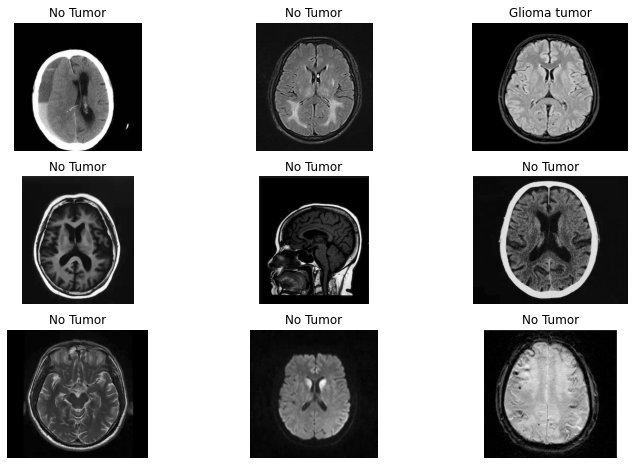

In [24]:

plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

(-0.5, 235.5, 217.5, -0.5)

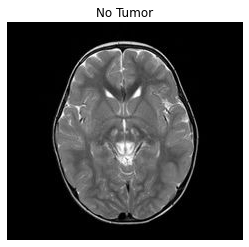

In [20]:
# plt.figure(figsize=(12,8))
# p = os.listdir('brain_tumor/Testing/')
# c=1
# for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')/[:16]:
#     plt.subplot(4,4,c)
jpg='brain_tumor/Testing/no_tumor/image(2).jpg'

img = cv2.imread(jpg,0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')